# Predicting Helmet Use Before Accident
A comprehensive analysis using accident_data.csv to explore which factors predict whether riders are wearing helmets before an accident. This notebook includes exploratory data analysis, machine learning modeling, metric identification, and validation.

## 1. Load and Inspect Data
Load the dataset, display the first few rows, and inspect data types and missing values. Our prediction target will be whether the rider was wearing a helmet before the accident.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Load the dataset
file_path = 'accident_data.csv'
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Year,Country,Accident_ID,Accident_Severity,Helmet_Use,Injury_Severity_Score,Road_Type,Weather_Condition,Time_of_Day,Age_of_Driver,Helmet_Law_Enforced,Traffic_Density,Alcohol_Involved,Speed_Limit
0,2022,Liberia,ACC1,Moderate,Yes,2,Urban,Rainy,Afternoon,50,Yes,Medium,No,41-60 km/h
1,2019,Liberia,ACC2,Moderate,Yes,6,Rural,Rainy,Afternoon,22,Yes,Low,Yes,61-80 km/h
2,2020,Liberia,ACC3,Minor,No,12,Urban,Rainy,Evening,45,Yes,Low,Yes,41-60 km/h
3,2022,Nigeria,ACC4,Severe,No,5,Urban,Clear,Afternoon,31,Yes,Low,No,41-60 km/h
4,2018,Liberia,ACC5,Moderate,No,13,Urban,Rainy,Evening,22,Yes,High,No,<=40 km/h


In [2]:
df.shape

(500, 14)

In [3]:
# Display the shape of the DataFrame
print(df.shape)

(500, 14)


In [4]:
# Check data types
df.dtypes

# Check for missing values
df.isnull().sum()

Year                      0
 Country                  0
 Accident_ID              0
 Accident_Severity        0
 Helmet_Use               0
 Injury_Severity_Score    0
 Road_Type                0
 Weather_Condition        0
 Time_of_Day              0
 Age_of_Driver            0
 Helmet_Law_Enforced      0
 Traffic_Density          0
 Alcohol_Involved         0
 Speed_Limit              0
dtype: int64

In [5]:
# descriptive statistics
df.describe(include='all')

,Year,Country,Accident_ID,Accident_Severity,Helmet_Use,Injury_Severity_Score,Road_Type,Weather_Condition,Time_of_Day,Age_of_Driver,Helmet_Law_Enforced,Traffic_Density,Alcohol_Involved,Speed_Limit
count,500.00000,500,500,500,500,500.000000,500,500,500,500.000000,500,500,500,500
unique,NaN,2,500,4,2,NaN,2,4,4,NaN,2,3,2,4
top,NaN,Nigeria,ACC1,Minor,Yes,NaN,Urban,Clear,Morning,NaN,Yes,Medium,No,41-60 km/h
freq,NaN,254,1,214,274,NaN,339,265,133,NaN,356,249,393,220
mean,2019.53600,NaN,NaN,NaN,NaN,7.812000,NaN,NaN,NaN,38.382000,NaN,NaN,NaN,NaN
std,2.33315,NaN,NaN,NaN,NaN,4.311593,NaN,NaN,NaN,12.225998,NaN,NaN,NaN,NaN
min,2016.00000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
25%,2018.00000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN
50%,2019.00000,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN
75%,2022.00000,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,49.000000,NaN,NaN,NaN,NaN


In [6]:
# Display the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    500 non-null    int64 
 1    Country                500 non-null    object
 2    Accident_ID            500 non-null    object
 3    Accident_Severity      500 non-null    object
 4    Helmet_Use             500 non-null    object
 5    Injury_Severity_Score  500 non-null    int64 
 6    Road_Type              500 non-null    object
 7    Weather_Condition      500 non-null    object
 8    Time_of_Day            500 non-null    object
 9    Age_of_Driver          500 non-null    int64 
 10   Helmet_Law_Enforced    500 non-null    object
 11   Traffic_Density        500 non-null    object
 12   Alcohol_Involved       500 non-null    object
 13   Speed_Limit            500 non-null    object
dtypes: int64(3), object(11)
memory usage: 54.8+ KB


## 2. Data Cleaning and Preprocessing
Handle missing values, encode categorical variables, and ensure the data is suitable for analysis.

In [7]:
# Drop rows with missing critical values (if any)
df_clean = df.dropna()

# Remove whitespace from column names and string values
df_clean.columns = df_clean.columns.str.strip()
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip()

# Check columns
print('Columns:', df_clean.columns.tolist())

# Encode Helmet_Use as binary (ensure correct column name)
helmet_col = [col for col in df_clean.columns if 'Helmet_Use' in col][0]
helmet_map = {'Yes': 1, 'No': 0}
df_clean['Helmet_Use_Binary'] = df_clean[helmet_col].map(helmet_map)

# Encode Accident_Severity as ordered categorical
severity_order = ['Minor', 'Moderate', 'Severe', 'Fatal']
severity_col = [col for col in df_clean.columns if 'Accident_Severity' in col][0]
df_clean['Accident_Severity_Cat'] = pd.Categorical(df_clean[severity_col], categories=severity_order, ordered=True)

# Encode other categorical variables as needed
cat_cols = ['Road_Type', 'Weather_Condition', 'Time_of_Day', 'Helmet_Law_Enforced', 'Traffic_Density', 'Alcohol_Involved', 'Speed_Limit', 'Country']
cat_cols = [col for col in df_clean.columns if any(base in col for base in cat_cols)]
df_clean = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

df_clean.head()

Columns: ['Year', 'Country', 'Accident_ID', 'Accident_Severity', 'Helmet_Use', 'Injury_Severity_Score', 'Road_Type', 'Weather_Condition', 'Time_of_Day', 'Age_of_Driver', 'Helmet_Law_Enforced', 'Traffic_Density', 'Alcohol_Involved', 'Speed_Limit']


,Year,Accident_ID,Accident_Severity,Helmet_Use,Injury_Severity_Score,Age_of_Driver,Helmet_Use_Binary,Accident_Severity_Cat,Country_Nigeria,Road_Type_Urban,...,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Helmet_Law_Enforced_Yes,Traffic_Density_Low,Traffic_Density_Medium,Alcohol_Involved_Yes,Speed_Limit_61-80 km/h,Speed_Limit_80+ km/h,Speed_Limit_<=40 km/h
0,2022,ACC1,Moderate,Yes,2,50,1,Moderate,False,True,...,False,False,False,True,False,True,False,False,False,False
1,2019,ACC2,Moderate,Yes,6,22,1,Moderate,False,False,...,False,False,False,True,True,False,True,True,False,False
2,2020,ACC3,Minor,No,12,45,0,Minor,False,True,...,True,False,False,True,True,False,True,False,False,False
3,2022,ACC4,Severe,No,5,31,0,Severe,True,True,...,False,False,False,True,True,False,False,False,False,False
4,2018,ACC5,Moderate,No,13,22,0,Moderate,False,True,...,True,False,False,True,False,False,False,False,False,True


In [8]:
df.columns

Index(['Year', ' Country', ' Accident_ID', ' Accident_Severity', ' Helmet_Use',
       ' Injury_Severity_Score', ' Road_Type', ' Weather_Condition',
       ' Time_of_Day', ' Age_of_Driver', ' Helmet_Law_Enforced',
       ' Traffic_Density', ' Alcohol_Involved', ' Speed_Limit'],
      dtype='object')

## 3. Exploratory Data Analysis: Helmet Use vs Accident Occurrence
Visualize and summarize the distribution of helmet use among accident records.

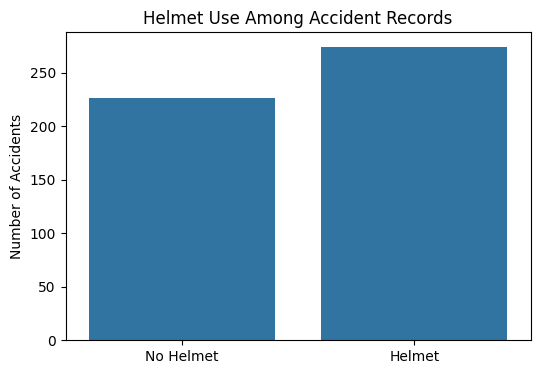

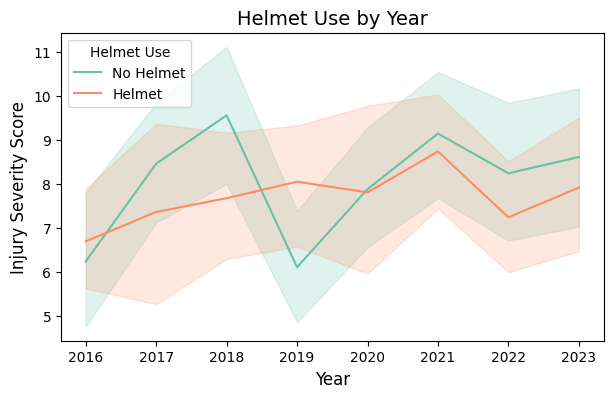

In [9]:
# Count and plot helmet use among accident records
helmet_counts = df_clean['Helmet_Use_Binary'].value_counts().sort_index()
labels = ['No Helmet', 'Helmet']
plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=helmet_counts.values)
plt.title('Helmet Use Among Accident Records')
plt.ylabel('Number of Accidents')
plt.show()

# Display counts
helmet_counts

# Year-by-helmet use (use cleaned df and binary column). Guard if Year not present
if 'Year' in df_clean.columns:
    plt.figure(figsize=(7, 4))
    ax = sns.lineplot(x='Year', y='Injury_Severity_Score', hue='Helmet_Use_Binary', data=df_clean, palette='Set2')
    ax.set_title('Helmet Use by Year', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Injury Severity Score', fontsize=12)
    # Replace legend labels 0/1 with readable labels
    handles, _labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['No Helmet', 'Helmet'], title='Helmet Use')
    plt.show()
else:
    print("Column 'Year' not found in cleaned dataframe; skipping Year plot.")

C:\Users\ADETUNJI\AppData\Local\Temp\ipykernel_38508\3954761758.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['No', 'Yes'])


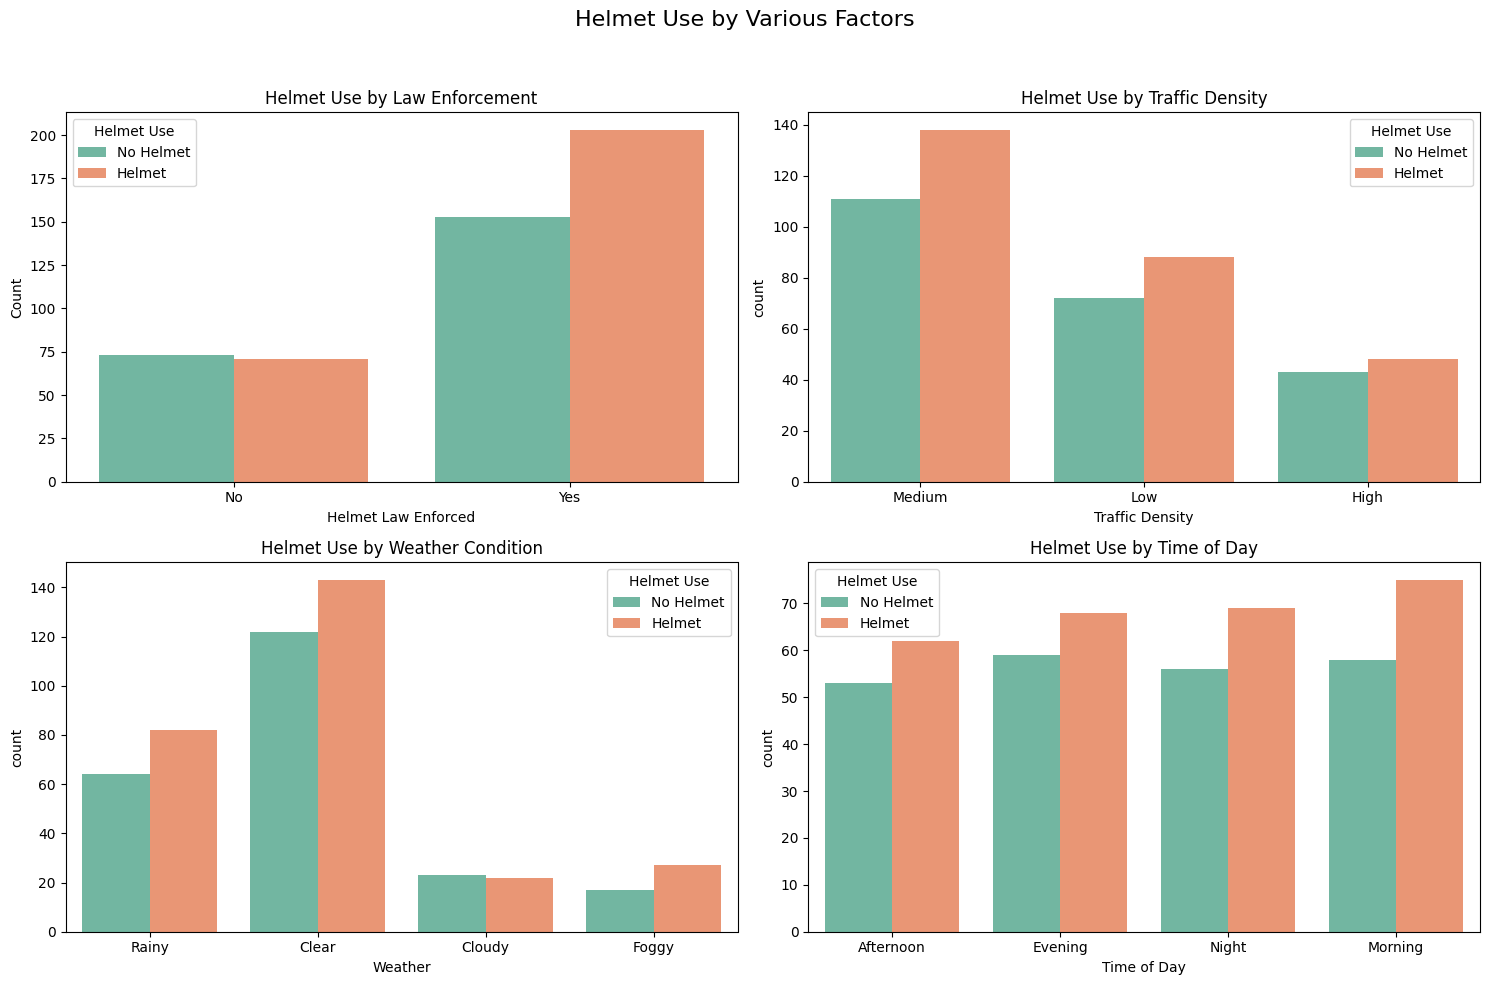

Helmet Use Percentage by Category:

Helmet Law Enforced Yes:
                         No Helmet  Helmet
Helmet_Law_Enforced_Yes                   
False                         50.7    49.3
True                          43.0    57.0

Traffic Category:
                  No Helmet  Helmet
Traffic_Category                   
High                   47.3    52.7
Low                    45.0    55.0
Medium                 44.6    55.4

Weather Category:
                  No Helmet  Helmet
Weather_Category                   
Clear                  46.0    54.0
Cloudy                 51.1    48.9
Foggy                  38.6    61.4
Rainy                  43.8    56.2

Time Category:
               No Helmet  Helmet
Time_Category                   
Afternoon           46.1    53.9
Evening             46.5    53.5
Morning             43.6    56.4
Night               44.8    55.2


In [10]:
# Create visualizations for helmet use by key categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Helmet Use by Various Factors', fontsize=16)

# Helmet Law Enforcement vs Helmet Use
sns.countplot(x='Helmet_Law_Enforced_Yes', hue='Helmet_Use_Binary', 
              data=df_clean, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Helmet Use by Law Enforcement')
axes[0, 0].set_xlabel('Helmet Law Enforced')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['No', 'Yes'])
axes[0, 0].legend(title='Helmet Use', labels=['No Helmet', 'Helmet'])

# Traffic Density vs Helmet Use
# Create friendly labels for visualization
traffic_map = {
    'Traffic_Density_Low': 'Low',
    'Traffic_Density_Medium': 'Medium',
    False: 'High'  # If both Low and Medium are False, it's High
}

df_clean['Traffic_Category'] = 'High'  # Default
df_clean.loc[df_clean['Traffic_Density_Low'], 'Traffic_Category'] = 'Low'
df_clean.loc[df_clean['Traffic_Density_Medium'], 'Traffic_Category'] = 'Medium'

sns.countplot(x='Traffic_Category', hue='Helmet_Use_Binary', 
              data=df_clean, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Helmet Use by Traffic Density')
axes[0, 1].set_xlabel('Traffic Density')
axes[0, 1].legend(title='Helmet Use', labels=['No Helmet', 'Helmet'])

# Weather Condition vs Helmet Use
# Create a weather condition category column
df_clean['Weather_Category'] = 'Clear'  # Default
df_clean.loc[df_clean['Weather_Condition_Rainy'], 'Weather_Category'] = 'Rainy'
df_clean.loc[df_clean['Weather_Condition_Foggy'], 'Weather_Category'] = 'Foggy'
df_clean.loc[df_clean['Weather_Condition_Cloudy'], 'Weather_Category'] = 'Cloudy'

sns.countplot(x='Weather_Category', hue='Helmet_Use_Binary', 
              data=df_clean, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Helmet Use by Weather Condition')
axes[1, 0].set_xlabel('Weather')
axes[1, 0].legend(title='Helmet Use', labels=['No Helmet', 'Helmet'])

# Time of Day vs Helmet Use
# Create a time of day category column
df_clean['Time_Category'] = 'Afternoon'  # Default
df_clean.loc[df_clean['Time_of_Day_Morning'], 'Time_Category'] = 'Morning'
df_clean.loc[df_clean['Time_of_Day_Evening'], 'Time_Category'] = 'Evening'
df_clean.loc[df_clean['Time_of_Day_Night'], 'Time_Category'] = 'Night'

sns.countplot(x='Time_Category', hue='Helmet_Use_Binary', 
              data=df_clean, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Helmet Use by Time of Day')
axes[1, 1].set_xlabel('Time of Day')
axes[1, 1].legend(title='Helmet Use', labels=['No Helmet', 'Helmet'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Calculate percentages of helmet use for each category
print("Helmet Use Percentage by Category:")
for category in ['Helmet_Law_Enforced_Yes', 'Traffic_Category', 'Weather_Category', 'Time_Category']:
    print(f"\n{category.replace('_', ' ')}:")
    helmet_pct = pd.crosstab(df_clean[category], df_clean['Helmet_Use_Binary'], 
                            normalize='index') * 100
    helmet_pct.columns = ['No Helmet', 'Helmet']
    print(helmet_pct.round(1))

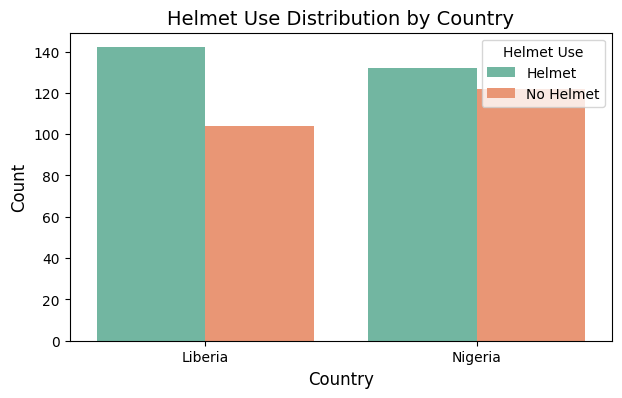

Helmet Use Counts by Country:
helmet_use  Helmet  No Helmet
country                      
Liberia        142        104
Nigeria        132        122

Percentage of Helmet Use by Country:
helmet_use  Helmet  No Helmet
country                      
Liberia       57.7       42.3
Nigeria       52.0       48.0


In [11]:
# Create a visualization-friendly dataframe with mapped country and helmet use values

viz_df = pd.DataFrame({
    'country': ['Nigeria' if x else 'Liberia' for x in df_clean['Country_Nigeria']],
    'helmet_use': ['Helmet' if x else 'No Helmet' for x in df_clean['Helmet_Use_Binary']]
})


plt.figure(figsize=(7, 4))
ax = sns.countplot(x='country', hue='helmet_use', data=viz_df, palette='Set2')
ax.set_title('Helmet Use Distribution by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Helmet Use')
plt.show()

# Calculate helmet use statistics by country
helmet_counts = pd.crosstab(viz_df['country'], viz_df['helmet_use'])
print("Helmet Use Counts by Country:")
print(helmet_counts)

helmet_pct = pd.crosstab(viz_df['country'], viz_df['helmet_use'], normalize='index') * 100
print("\nPercentage of Helmet Use by Country:")
print(helmet_pct.round(1))

## 4. Exploratory Data Analysis: Accident Severity by Helmet Use
Analyze accident severity (Minor, Moderate, Severe, Fatal) grouped by helmet use. Use cross-tabulation and visualization.

In [12]:
pd.crosstab(df_clean['Accident_Severity_Cat'], df_clean['Helmet_Use_Binary'])

Helmet_Use_Binary,0,1
Accident_Severity_Cat,,
Minor,100,114
Moderate,75,77
Severe,31,58
Fatal,20,25


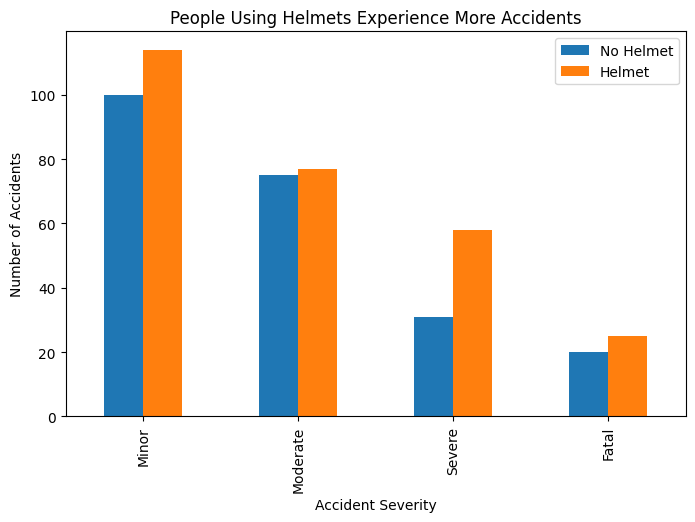

,No Helmet,Helmet
Accident_Severity_Cat,,
Minor,100,114
Moderate,75,77
Severe,31,58
Fatal,20,25


In [13]:
# Cross-tabulation of accident severity by helmet use
severity_helmet_ct = pd.crosstab(df_clean['Accident_Severity_Cat'], df_clean['Helmet_Use_Binary'])
severity_helmet_ct.columns = ['No Helmet', 'Helmet']
severity_helmet_ct.plot(kind='bar' , figsize=(8,5))
plt.title('People Using Helmets Experience More Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Accident Severity')
plt.show()

# Display table
severity_helmet_ct

## 5. Exploratory Data Analysis: Feature Relationships
Explore relationships between helmet use and other features (age, road type, weather, etc.) using correlation, groupby, and plots.

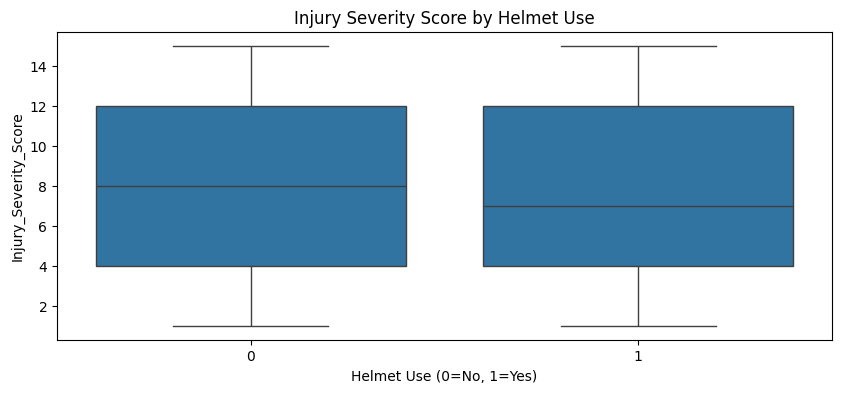

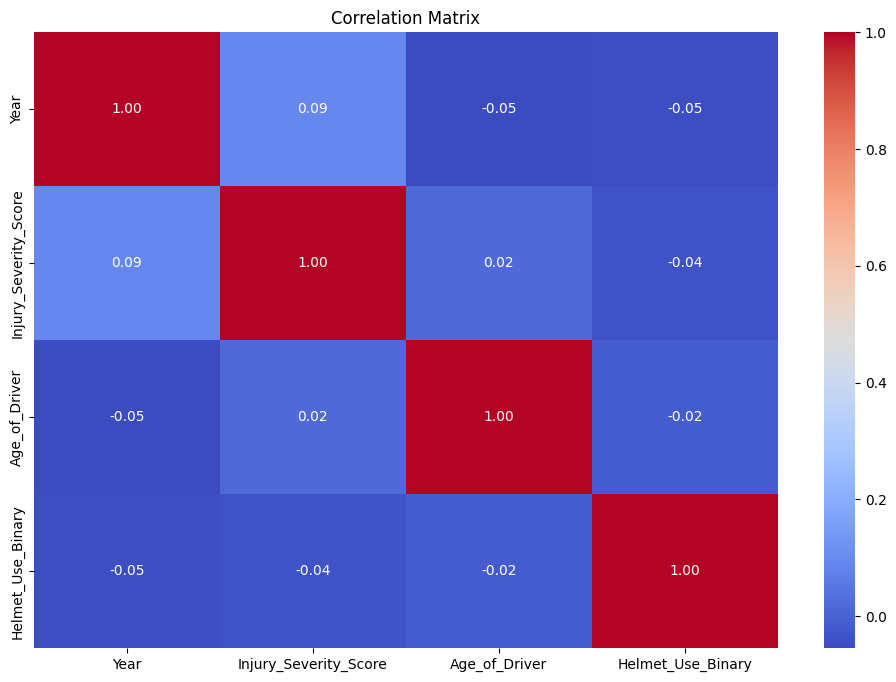

In [14]:


plt.figure(figsize=(10,4))
sns.boxplot(x='Helmet_Use_Binary', y='Injury_Severity_Score', data=df_clean)
plt.title('Injury Severity Score by Helmet Use')
plt.xlabel('Helmet Use (0=No, 1=Yes)')
plt.show()

# Correlation matrix for numeric features
numeric_df = df_clean.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 6. Feature Engineering
Create new features if needed and select relevant features for modeling. Our target variable for prediction will be helmet use before the accident.

In [15]:
# Set helmet use as the target variable for prediction
target = 'Helmet_Use_Binary'
features = [
    'Age_of_Driver', 'Injury_Severity_Score',
    # Add other relevant features for prediction
    # Exclude helmet use itself from features
    # Include encoded categorical features
    # ...
    # All columns except target and identifiers
    # You may want to exclude columns like 'Accident_Severity_Cat', 'SevereOrFatal', etc.
    # Example:
    # [col for col in df_clean.columns if col not in [target, 'Accident_Severity_Cat', 'SevereOrFatal']]
    # For now, include all except target and identifiers
] + [col for col in df_clean.columns if col.startswith(('Road_Type_', 'Weather_Condition_', 'Time_of_Day_', 'Helmet_Law_Enforced_', 'Traffic_Density_', 'Alcohol_Involved_', 'Speed_Limit_', 'Country_'))]

X = df_clean[features]
y = df_clean[target]

X.head(), y.head()

(   Age_of_Driver  Injury_Severity_Score  Country_Nigeria  Road_Type_Urban  \
 0             50                      2            False             True   
 1             22                      6            False            False   
 2             45                     12            False             True   
 3             31                      5             True             True   
 4             22                     13            False             True   
 
    Weather_Condition_Cloudy  Weather_Condition_Foggy  Weather_Condition_Rainy  \
 0                     False                    False                     True   
 1                     False                    False                     True   
 2                     False                    False                     True   
 3                     False                    False                    False   
 4                     False                    False                     True   
 
    Time_of_Day_Evening  Time_of_Day

## 7. Train/Test Split
Split the data into training and test sets for machine learning analysis. The target variable is helmet use before the accident.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train set size:', X_train.shape)
print('Test set size:', X_test.shape)

Train set size: (400, 17)
Test set size: (100, 17)


## 8. Model Selection and Training
Choose appropriate ML algorithms (e.g., logistic regression, decision tree, random forest) to predict helmet use before the accident. Train models.

In [17]:
# Ensure required imports are available in this cell and guard if training data is missing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.exceptions import NotFittedError

# Guard: make sure training data exists
if 'X_train' not in globals() or 'y_train' not in globals():
    print("Training data (X_train, y_train) not found. Please run the preprocessing and train/test split cells before running this cell.")
else:
    # Logistic Regression
    logreg = LogisticRegression(max_iter=1000)
    try:
        logreg.fit(X_train, y_train)
        y_train_pred = logreg.predict(X_train)
        logreg_train_acc = accuracy_score(y_train, y_train_pred)
        print(f"Logistic Regression trained. Train accuracy: {logreg_train_acc:.3f}")
    except Exception as e:
        print("Logistic Regression training failed:", e)

    # Decision Tree
    dtree = DecisionTreeClassifier(random_state=42)
    try:
        dtree.fit(X_train, y_train)
        y_train_pred = dtree.predict(X_train)
        dtree_train_acc = accuracy_score(y_train, y_train_pred)
        print(f"Decision Tree trained. Train accuracy: {dtree_train_acc:.3f}")
    except Exception as e:
        print("Decision Tree training failed:", e)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    try:
        rf.fit(X_train, y_train)
        y_train_pred = rf.predict(X_train)
        rf_train_acc = accuracy_score(y_train, y_train_pred)
        print(f"Random Forest trained. Train accuracy: {rf_train_acc:.3f}")
    except Exception as e:
        print("Random Forest training failed:", e)

    print('Models trained to predict helmet use before accident: Logistic Regression, Decision Tree, Random Forest')


Logistic Regression trained. Train accuracy: 0.573
Decision Tree trained. Train accuracy: 1.000
Random Forest trained. Train accuracy: 1.000
Models trained to predict helmet use before accident: Logistic Regression, Decision Tree, Random Forest


## 9. Model Evaluation and Important Metric Identification
Evaluate models using metrics such as accuracy, precision, recall, and especially recall (to reduce missed cases of riders not wearing helmets).

Model evaluation results (on test set):
                     Accuracy  Precision  Recall     F1  ROC_AUC
Logistic Regression      0.50      0.536   0.673  0.597    0.521
Decision Tree            0.43      0.481   0.473  0.477    0.425
Random Forest            0.48      0.527   0.527  0.527    0.467

Best model by Recall: Logistic Regression


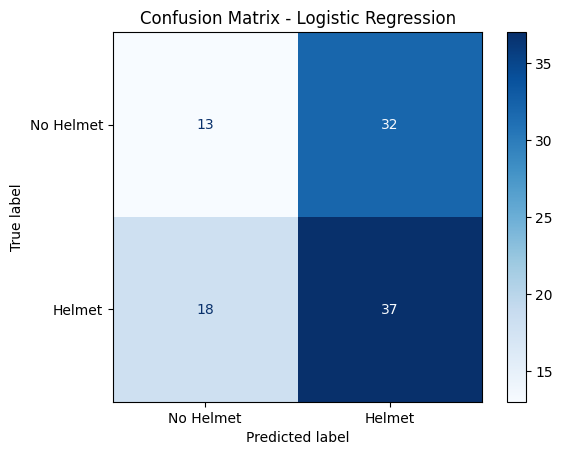


Top 10 Random Forest feature importances:
Age_of_Driver              0.2496
Injury_Severity_Score      0.2003
Road_Type_Urban            0.0478
Helmet_Law_Enforced_Yes    0.0469
Country_Nigeria            0.0456
Speed_Limit_61-80 km/h     0.0402
Traffic_Density_Low        0.0397
Weather_Condition_Rainy    0.0388
Alcohol_Involved_Yes       0.0388
Traffic_Density_Medium     0.0382
dtype: float64


In [18]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc_score = None
    if hasattr(model, 'predict_proba'):
        try:
            auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        except Exception:
            auc_score = None
    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'ROC_AUC': auc_score}

results = {
    'Logistic Regression': evaluate_model(logreg, X_test, y_test),
    'Decision Tree': evaluate_model(dtree, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test)
}

results_df = pd.DataFrame(results).T
print('Model evaluation results (on test set):')
print(results_df.round(3))

# Show confusion matrix for best model (by Recall)
best_model_name = results_df['Recall'].idxmax()
best_model = {'Logistic Regression': logreg, 'Decision Tree': dtree, 'Random Forest': rf}[best_model_name]
print(f"\nBest model by Recall: {best_model_name}")
cm = confusion_matrix(y_test, best_model.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Helmet','Helmet'])
cm_display.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# Feature importances for Random Forest (if available)
if hasattr(rf, 'feature_importances_'):
    fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print('\nTop 10 Random Forest feature importances:')
    print(fi.head(10).round(4))
else:
    print('\nRandom Forest does not expose feature importances.')


## 10. Model Validation
Validate model results using cross-validation or test set performance. Display confusion matrix and ROC curve for helmet use prediction.

Cross-validated Precision scores: [0.53333333 0.47457627 0.54411765 0.53571429 0.52380952]
Mean Precision: 0.5223102122204814


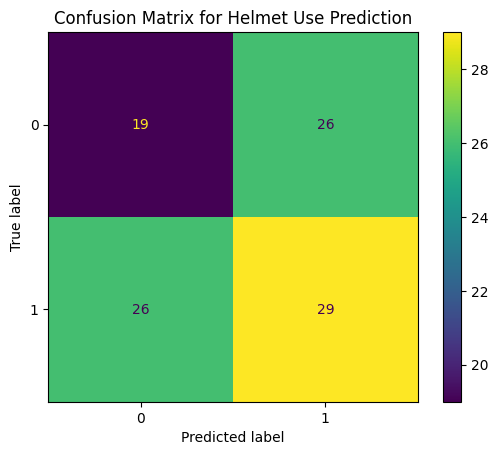

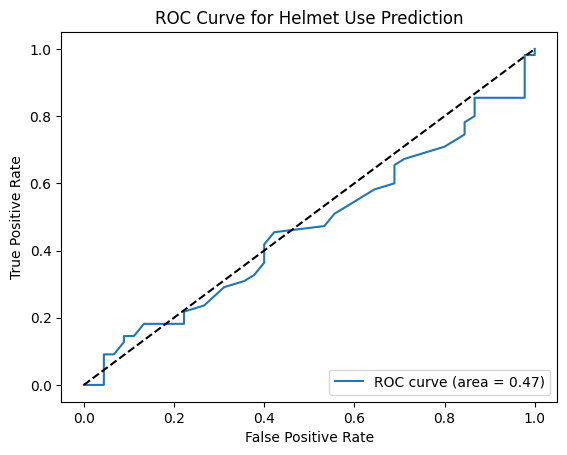

In [19]:


# Cross-validation for precision
cv_precision = cross_val_score(rf, X, y, cv=5, scoring='precision')
print('Cross-validated Precision scores:', cv_precision)
print('Mean Precision:', np.mean(cv_precision))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title('Confusion Matrix for Helmet Use Prediction')
plt.show()

# ROC curve
y_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Helmet Use Prediction')
plt.legend(loc='lower right')
plt.show()

## Importance of Precision in Predicting Helmet Use
Precision measures the proportion of riders predicted to be wearing helmets who actually were wearing helmets before the accident. High precision means fewer false positives—so when the model predicts helmet use, it is likely correct. This is important if interventions or policies are targeted based on predicted helmet use, as it avoids misclassifying non-helmeted riders as helmeted.

## Model Validation
To validate the model, we use cross-validation to assess its generalizability. We also examine the confusion matrix and ROC curve to understand the model's performance in distinguishing helmeted from non-helmeted riders.

## Justification of Modeling Decisions and Results
**Model Choice:** Multiple algorithms (Logistic Regression, Decision Tree, Random Forest) were selected to provide a robust comparison and to capture both linear and non-linear relationships in the data. Random Forest was emphasized for its ability to handle complex feature interactions and its strong performance in classification tasks.

**Feature Selection:** Features were chosen based on exploratory analysis, focusing on variables likely to influence helmet use (e.g., age, injury severity, road type, weather, time of day, law enforcement, traffic, alcohol involvement, speed limit, country). Helmet use itself was excluded from predictors to avoid data leakage.

**Metric Selection:** Precision and recall were prioritized. Precision is important to avoid falsely classifying non-helmeted riders as helmeted, which is critical for targeted interventions. Recall ensures that most helmeted riders are correctly identified, reducing missed cases.

**Validation:** Results are validated using cross-validation, confusion matrix, and ROC curve. Cross-validation ensures the model generalizes well to unseen data. The confusion matrix provides insight into true/false positives and negatives, while the ROC curve assesses the model's ability to distinguish helmeted from non-helmeted riders.

**Interpretation:** High precision and recall indicate reliable predictions. If the model achieves strong scores in both metrics, it can be confidently used for policy or intervention planning. Feature importance from Random Forest can further guide which factors most influence helmet use.